## 통신사 고객 탐색적 분석

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns 
import koreanize_matplotlib
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 100) 

In [2]:
train = pd.read_csv('./cell2celltrain.csv')
train

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,LAXSFN818,2.0,2.0,526.0,68.0,64.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,LAXCDG310,2.0,2.0,464.0,48.0,48.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,LAXCDG310,3.0,2.0,378.0,36.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,NEVPOW619,2.0,2.0,433.0,32.0,0.0,Yes,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,9,No,0,30,No,5-Low,Other,Other,No


In [3]:
train.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [4]:
# CustomerID, ServiceArea 컬럼 삭제
train = train.drop(["CustomerID", "ServiceArea"], axis=1)

In [5]:
# family 컬럼 생성
family_type = train.apply(lambda row : 'Nuclear Families' if (row['ChildrenInHH'] == 'Yes') & (row['MaritalStatus'] == 'Yes') else 'Childless' if (row['ChildrenInHH'] == 'No') & (row['MaritalStatus'] == 'Yes') else 'Single-parent' if (row['ChildrenInHH'] == 'Yes') & (row['MaritalStatus'] == 'No') else 'Unknown', axis=1)

train['Family'] = family_type
train[['AgeHH1','AgeHH2','MaritalStatus', 'ChildrenInHH', 'Family']]

,AgeHH1,AgeHH2,MaritalStatus,ChildrenInHH,Family
0,62.0,0.0,No,No,Unknown
1,40.0,42.0,Yes,Yes,Nuclear Families
2,26.0,26.0,Yes,Yes,Nuclear Families
3,30.0,0.0,No,No,Unknown
4,46.0,54.0,Yes,No,Childless
...,...,...,...,...,...
51042,68.0,64.0,Yes,No,Childless
51043,48.0,48.0,No,Yes,Single-parent
51044,36.0,0.0,No,No,Unknown
51045,32.0,0.0,No,Yes,Single-parent


In [6]:
# age 컬럼 생성
train['Age'] = (train['AgeHH1'] + train['AgeHH2'])/2
train.drop(['AgeHH1', 'AgeHH2'], axis=1, inplace=True)

In [7]:
# 항목 개수를 확인하기 위해 'count' 컬럼 생성
train['count'] = 1

In [8]:
# 이탈 고객과 미이탈 고객의 dataframe 각각 생성
churn_y = train[train['Churn']=='Yes']
churn_y = churn_y.reset_index(drop=True)

churn_n = train[train['Churn']=='No']
churn_n = churn_n.reset_index(drop=True)

In [9]:
# dataframe 이름과 컬럼명을 넣으면 항목별 비율 반환하는 함수
def get_percent(df_name, column_name):
    return round(df_name[column_name].value_counts() / len(df_name) * 100, 1)

In [10]:
# dataframe 이름과 컬럼명을 넣으면 항목별 비율을 피벗테이블로 반환하는 함수
def pivot_percent(df_name, column_name):
    pivot_table = df_name.pivot_table(index=column_name, columns='Churn', values='count', aggfunc=np.sum) / len(df_name) * 100
    
    return round(pivot_table, 1)

In [11]:
# 범주형, 수치형 구분하여 dataframe 생성
# HandsetPrice는 수치형인데 Unknown값이 들어가 있어서 제외

numeric_features = train[['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes',
                           'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls',
                           'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
                           'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber',
                           'AdjustmentsToCreditRating', 'Age']]

categoric_features = train[['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
                             'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'IncomeGroup', 'OwnsMotorcycle',
                             'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus', 'Family', 'Churn']]

### Categoric Columns

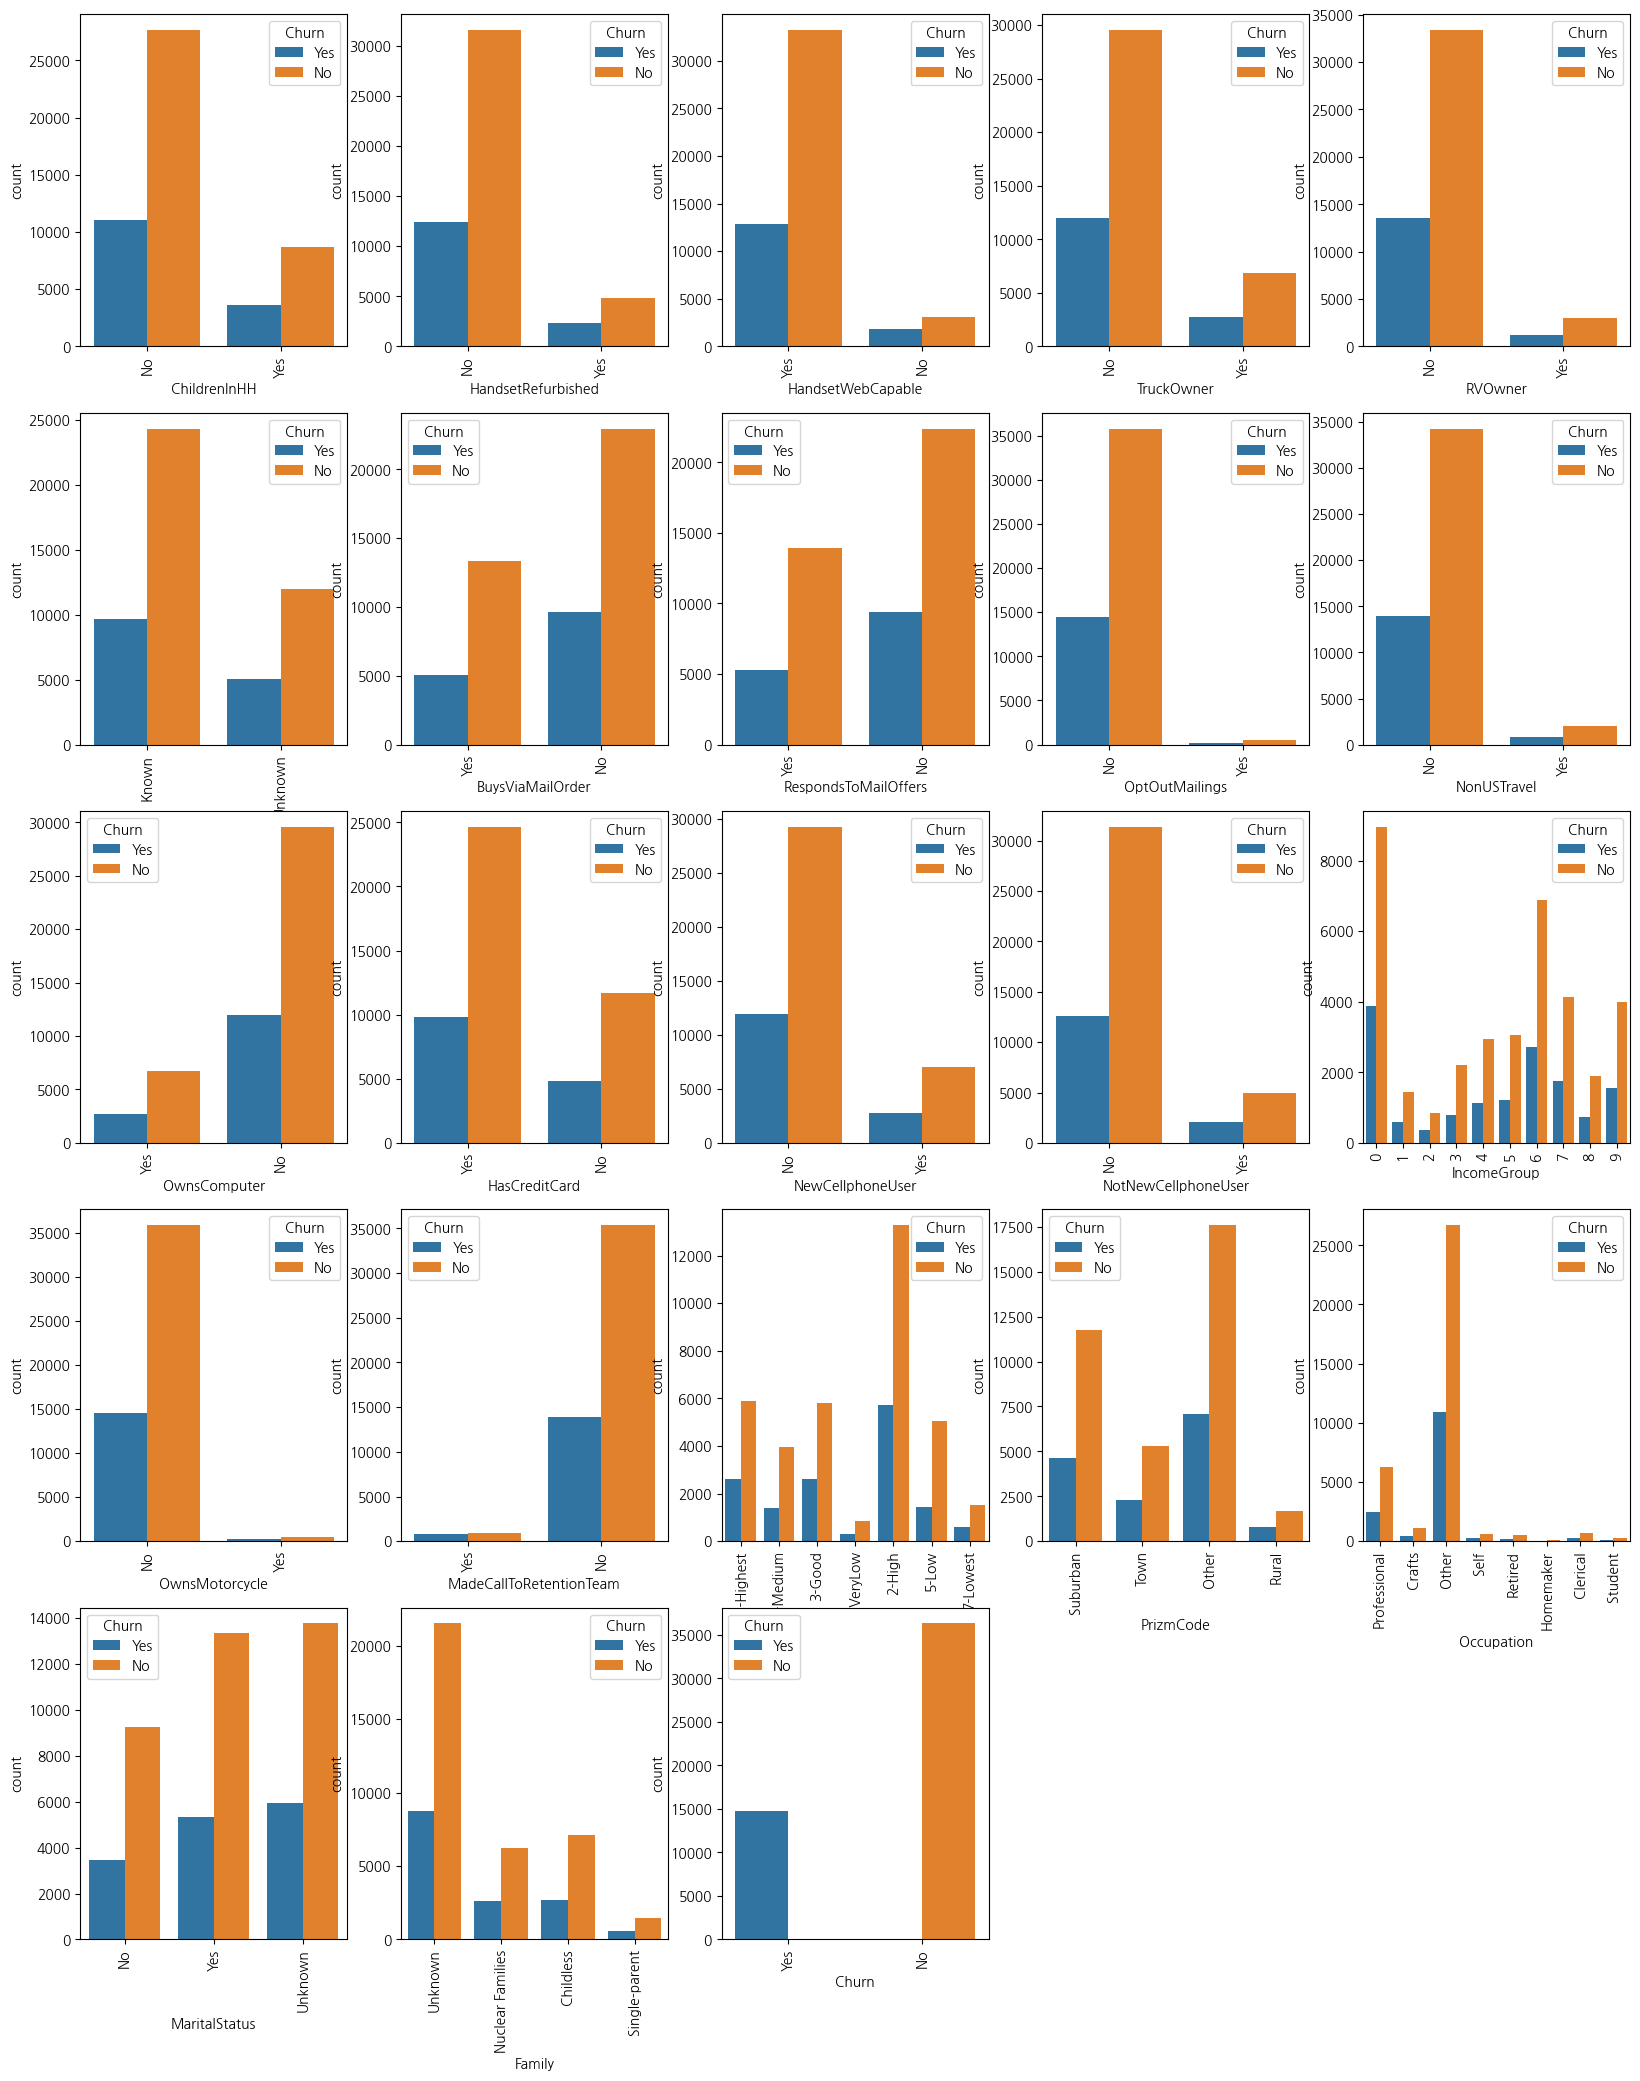

In [12]:
plots_per_row = 5

number_of_plots = categoric_features.shape[-1]

fig, axes = plt.subplots((number_of_plots//plots_per_row) + (number_of_plots % 5 != 0), plots_per_row)

axes = axes.flatten()

count = 0
for index, col in categoric_features.columns.to_series().items():
    a = sns.countplot(x=categoric_features[col], hue=categoric_features.Churn, ax=axes[count])
    a.tick_params(axis='x', labelrotation=90)
    count += 1
   
for i in range(1, len(axes) - number_of_plots + 1):
    fig.delaxes(axes[-i]) # 빈 subplot은 삭제
 
fig.set_figwidth(20)
fig.set_figheight(25)
plt.show()

#### PrizmCode, Occupation, Homeownership, MaritalStatus 컬럼

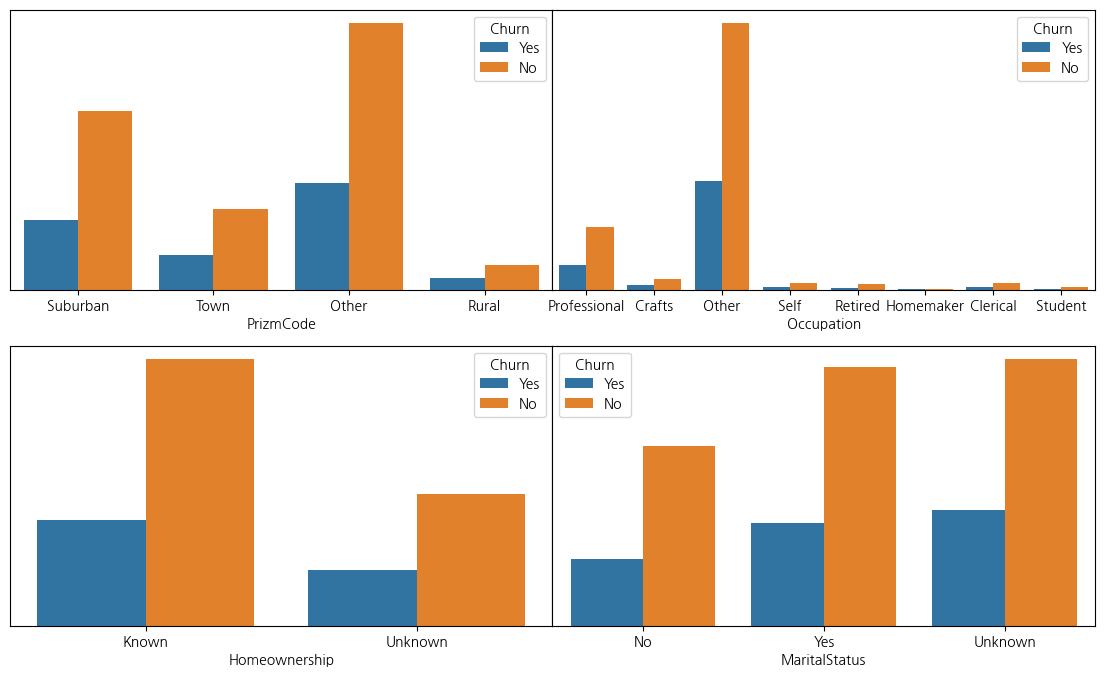

In [13]:
plt.figure(figsize=(14, 8))
plt.subplots_adjust(wspace=0) #그래프 사이 간격 조정

plt.subplot(2, 2, 1)
plt.gca().axes.yaxis.set_visible(False) # y축만 없애기
sns.countplot(data=train, x='PrizmCode', hue='Churn')

plt.subplot(2, 2, 2)
plt.gca().axes.yaxis.set_visible(False) 
sns.countplot(data=train, x='Occupation', hue='Churn')

plt.subplot(2, 2, 3)
plt.gca().axes.yaxis.set_visible(False) 
sns.countplot(data=train, x='Homeownership', hue='Churn')

plt.subplot(2, 2, 4)
plt.gca().axes.yaxis.set_visible(False) 
sns.countplot(data=train, x='MaritalStatus', hue='Churn')
    
plt.show()

* Other값이 많은 컬럼: PrizmCode, Occupation
* Unknown값이 많은 컬럼: Homeownership, MaritalStatus

### Numeric Columns

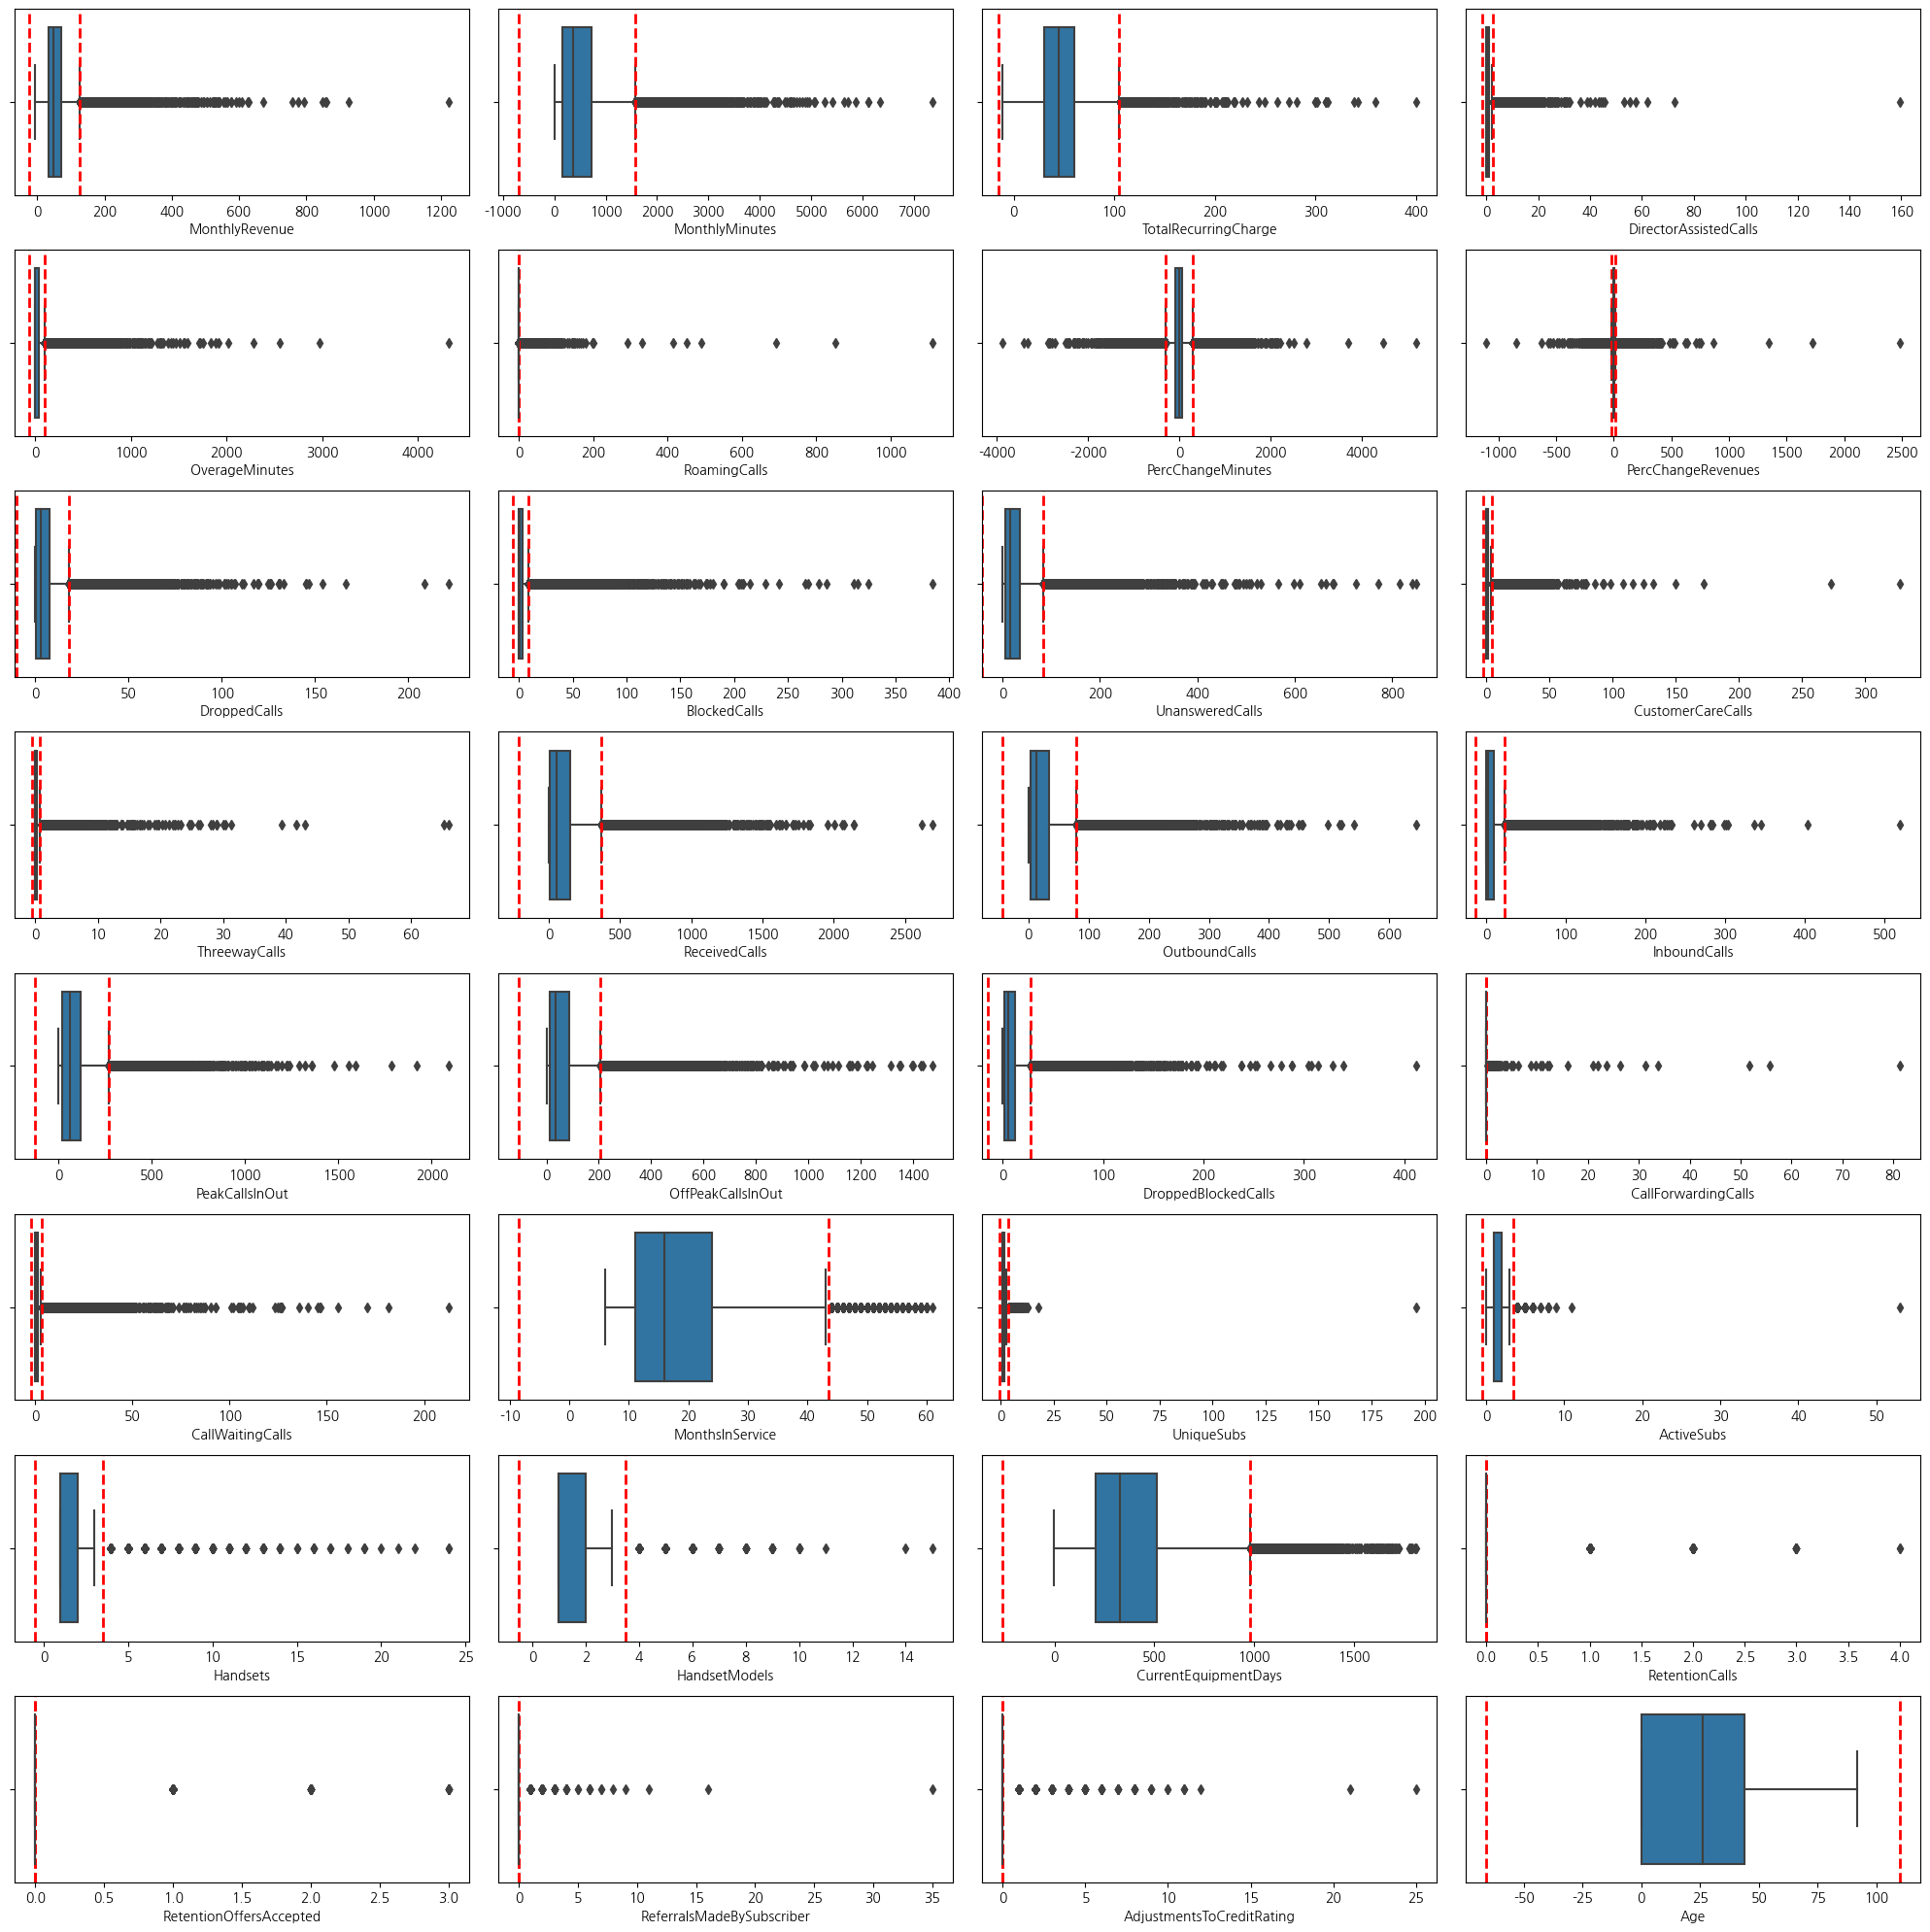

In [14]:
num_rows = 8
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

axes = axes.flatten()

for i, column in enumerate(numeric_features.columns):
    sns.boxplot(x=train[column], ax=axes[i])
    
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_fence = Q3 + 1.5 * IQR
    lower_fence = Q1 - 1.5 * IQR
    
    axes[i].axvline(upper_fence, color='r', linestyle='--', linewidth=2)
    axes[i].axvline(lower_fence, color='r', linestyle='--', linewidth=2)

if len(numeric_features.columns) < len(axes):
    for j in range(len(numeric_features.columns), len(axes)):
        axes[j].axis('off')

plt.tight_layout()
plt.show()

#### HandsetPrice 컬럼

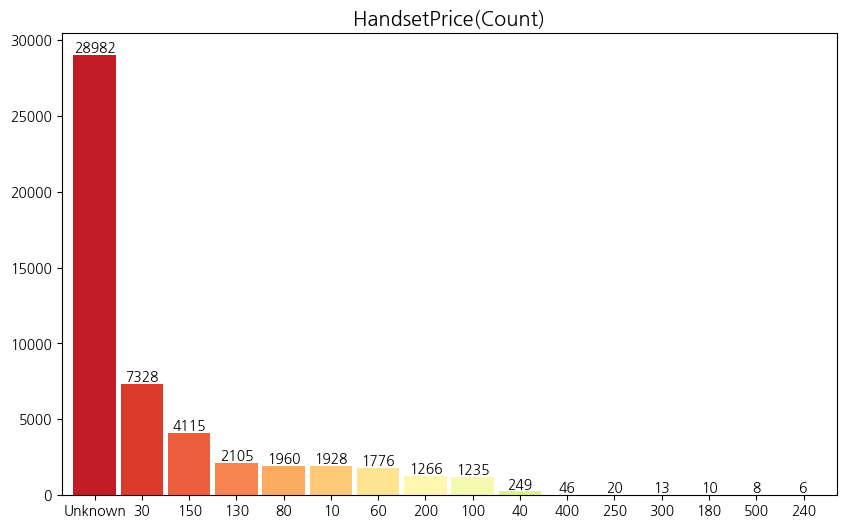

In [15]:
colors = sns.color_palette('RdYlGn', 16)
ax = train.HandsetPrice.value_counts().plot(kind="bar", figsize=(10, 6), width=0.9, color=colors)

for c in ax.containers:
    labels = [ x.get_height() for x in c ]
    ax.bar_label(c, labels= np.round(labels, 1), label_type='edge')
    
plt.rcParams['font.size'] = 12
plt.title('HandsetPrice(Count)')
plt.xticks(rotation=0)
plt.show()

* Unknown값이 28,982개로 전체 데이터의 절반 이상을 차지한다.

---

### 고객 이탈 비율

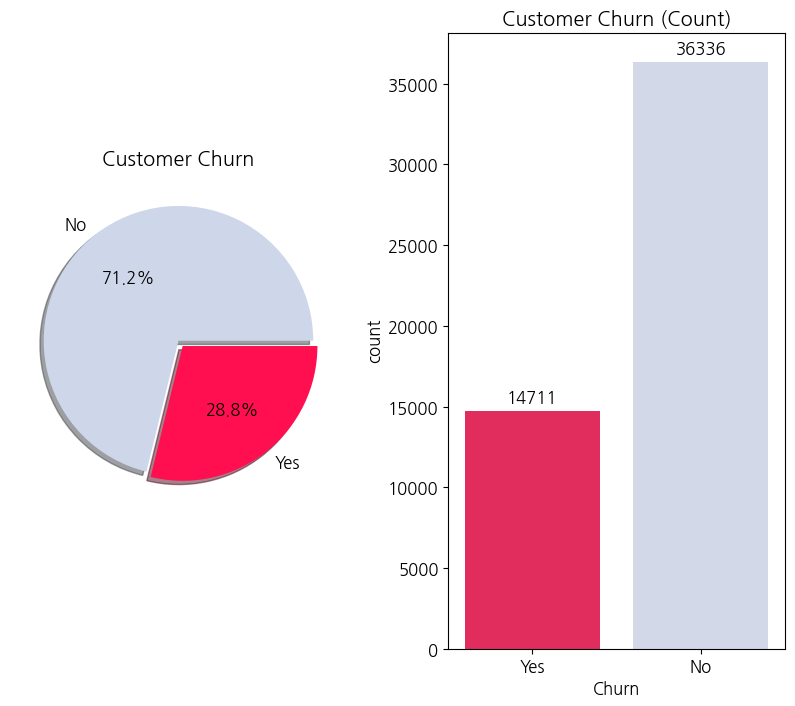

In [16]:
f, ax = plt.subplots(1, 2, figsize = (10, 8)) 
plt.subplots_adjust(wspace=0.3)

train['Churn'].value_counts().plot.pie(explode = [0, 0.05], # 각 조각 사이 거리
                                       autopct='%1.1f%%', # 퍼센트 표시
                                       ax=ax[0], # 첫번째 위치에 그리기
                                       colors=['#CED7EA', '#ff0f4f'],
                                       shadow=True) 

ax[0].set_title('Customer Churn')
ax[0].set_ylabel('') 

sns.countplot(data=train, x='Churn', ax=ax[1], palette=['#ff0f4f','#CED7EA'])
for p in ax[1].patches: # 데이터 텍스트 표시 
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')    
ax[1].set_title('Customer Churn (Count)')

plt.rcParams['font.size'] = 12

plt.show()

### 결혼 여부

In [17]:
def draw_count_plot(df, title1, title2, x1, x2, hue):
    f, ax = plt.subplots(1,2, figsize=(10,8))
    plt.subplots_adjust(wspace=0.3)

    ax[0].set_title(title1)
    sns.countplot(x=x1, data=df, ax=ax[0], palette=['#3498db', '#f06060', '#66c9b0', '#fcee9c'])
    for p in ax[0].patches: # 데이터 텍스트 표시  
        ax[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 

    ax[1].set_title(title2)
    sns.countplot(x=x2, data=df, hue=hue, ax=ax[1], palette=['#ff0f4f', '#CED7EA'])
    for p in ax[1].patches: # 데이터 텍스트 표시 
        ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()
    plt.show()

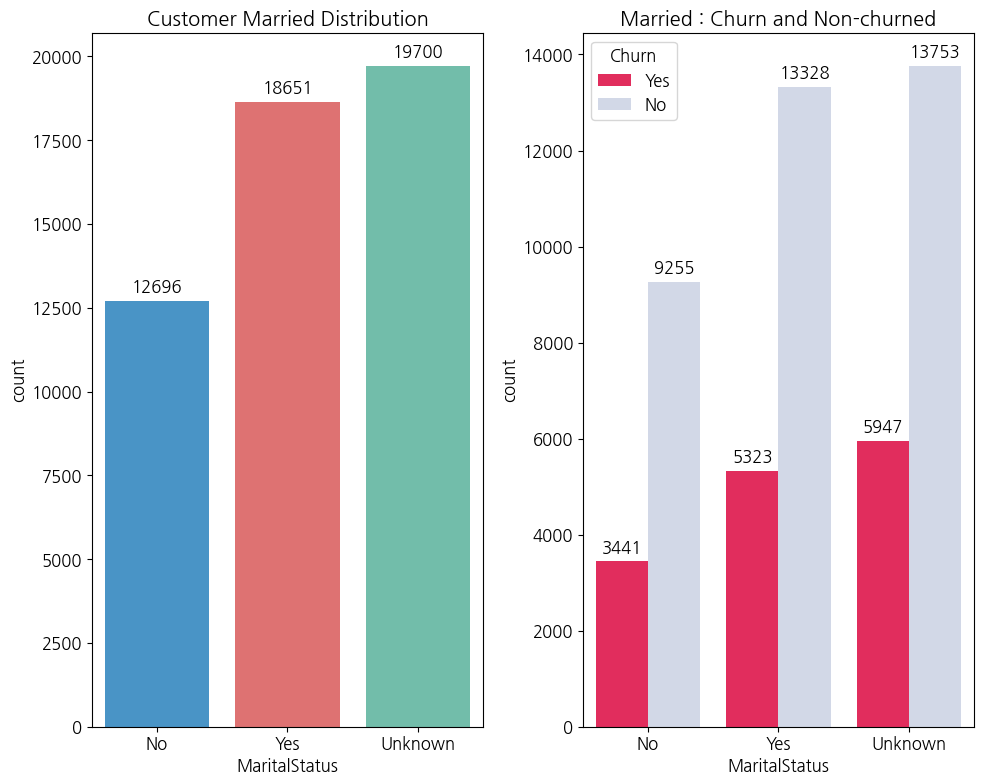

In [18]:
draw_count_plot(train,'Customer Married Distribution', 'Married : Churn and Non-churned','MaritalStatus','MaritalStatus', 'Churn')

In [19]:
# Unknown 데이터 제거
marriage = train[train['MaritalStatus'] != 'Unknown']

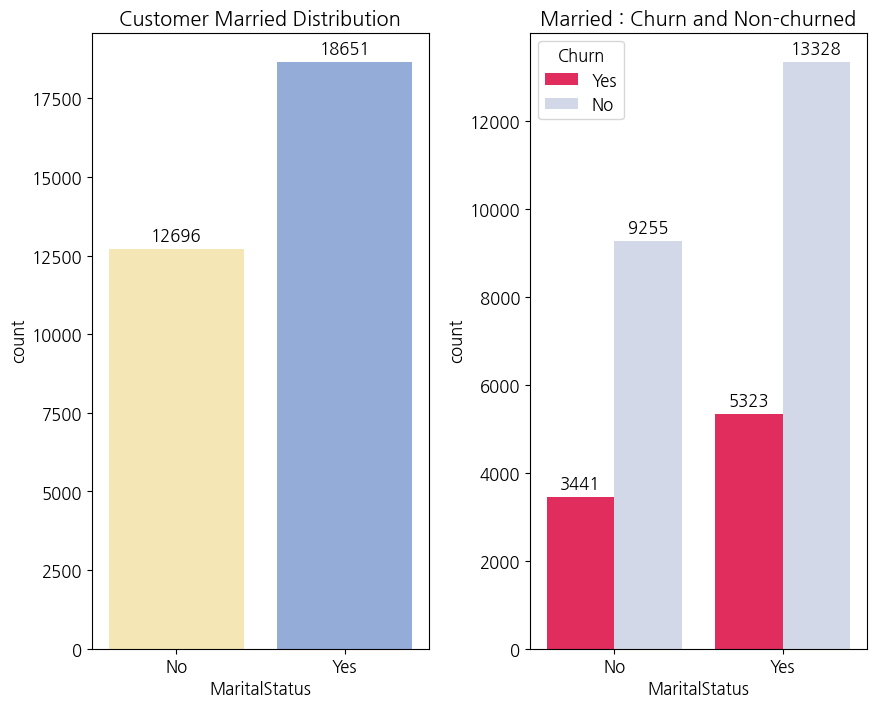

In [20]:
f, ax = plt.subplots(1,2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3)

ax[0].set_title('Customer Married Distribution')
sns.countplot(x='MaritalStatus', data=marriage, ax=ax[0], palette=['#ffecab', '#89aae3'])
for p in ax[0].patches: # 데이터 텍스트 표시  
    ax[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 

ax[1].set_title('Married : Churn and Non-churned')
sns.countplot(x='MaritalStatus', data=marriage, hue='Churn', ax=ax[1], palette=['#ff0f4f', '#CED7EA'])

for p in ax[1].patches: # 데이터 텍스트 표시 
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.rcParams['font.size'] = 12
plt.show()

* 기혼 고객의 이탈률이 더 높은 편이다.

### 자녀 유무

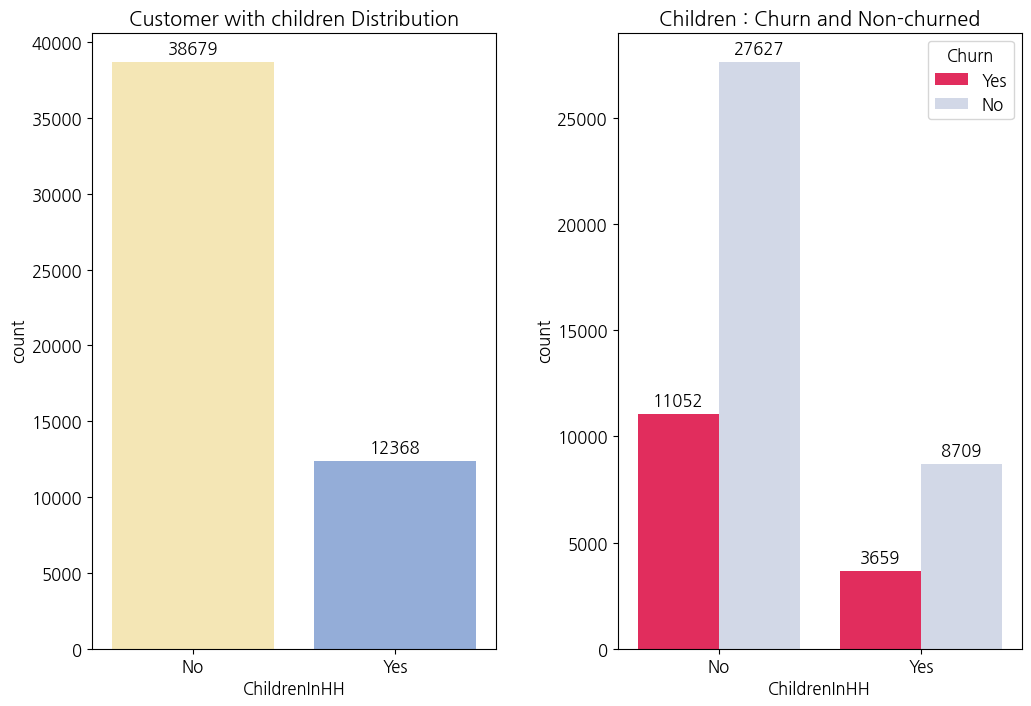

In [21]:
f, ax = plt.subplots(1,2, figsize=(12,8))
plt.subplots_adjust(wspace=0.3)

ax[0].set_title('Customer with children Distribution')
sns.countplot(x='ChildrenInHH', data=train, ax=ax[0], palette=['#ffecab', '#89aae3'])
for p in ax[0].patches: # 데이터 텍스트 표시  
    ax[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 

ax[1].set_title('Children : Churn and Non-churned')
sns.countplot(x='ChildrenInHH', data=train, hue='Churn', ax=ax[1], palette=['#ff0f4f', '#CED7EA'])
for p in ax[1].patches: # 데이터 텍스트 표시 
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.rcParams['font.size'] = 12
plt.show()

* 자녀가 없는 고객의 이탈률이 더 높은 편이다.

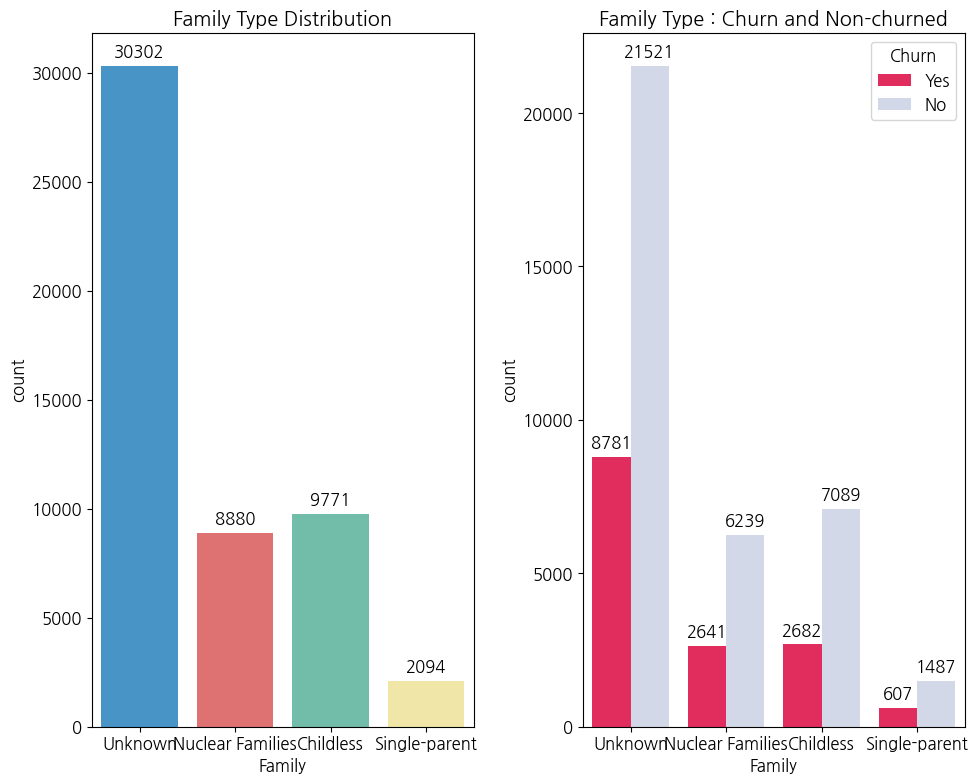

In [22]:
draw_count_plot(train,'Family Type Distribution', 'Family Type : Churn and Non-churned','Family','Family', 'Churn')

### 신용카드 보유

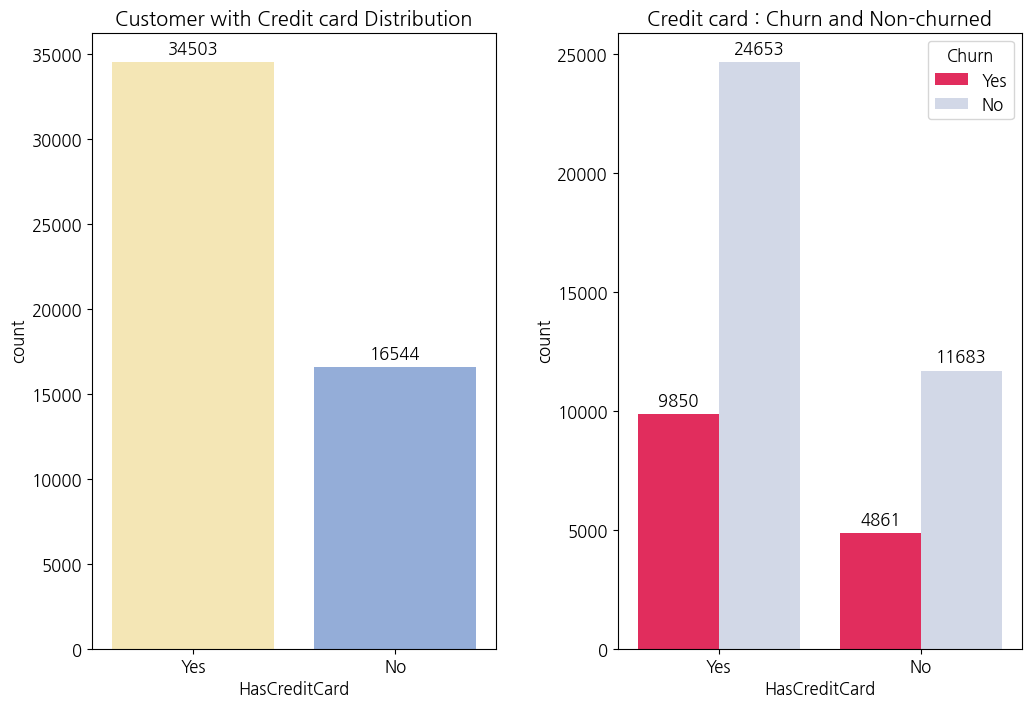

In [23]:
f, ax = plt.subplots(1,2, figsize=(12,8))
plt.subplots_adjust(wspace=0.3)

ax[0].set_title('Customer with Credit card Distribution')
sns.countplot(x='HasCreditCard', data=train, ax=ax[0], palette=['#ffecab', '#89aae3'])
for p in ax[0].patches: # 데이터 텍스트 표시  
    ax[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 

ax[1].set_title('Credit card : Churn and Non-churned')
sns.countplot(x='HasCreditCard', data=train, hue='Churn', ax=ax[1], palette=['#ff0f4f', '#CED7EA'])
for p in ax[1].patches: # 데이터 텍스트 표시 
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.rcParams['font.size'] = 12
plt.show()

* 신용카드를 보유한 고객의 이탈률이 더 높은 편이다.

### 신용 등급

In [24]:
credit_percent = get_percent(train, 'CreditRating').sort_values(ascending=False)
credit_percent

2-High       37.2
1-Highest    16.7
3-Good       16.5
5-Low        12.7
4-Medium     10.5
7-Lowest      4.1
6-VeryLow     2.3
Name: CreditRating, dtype: float64

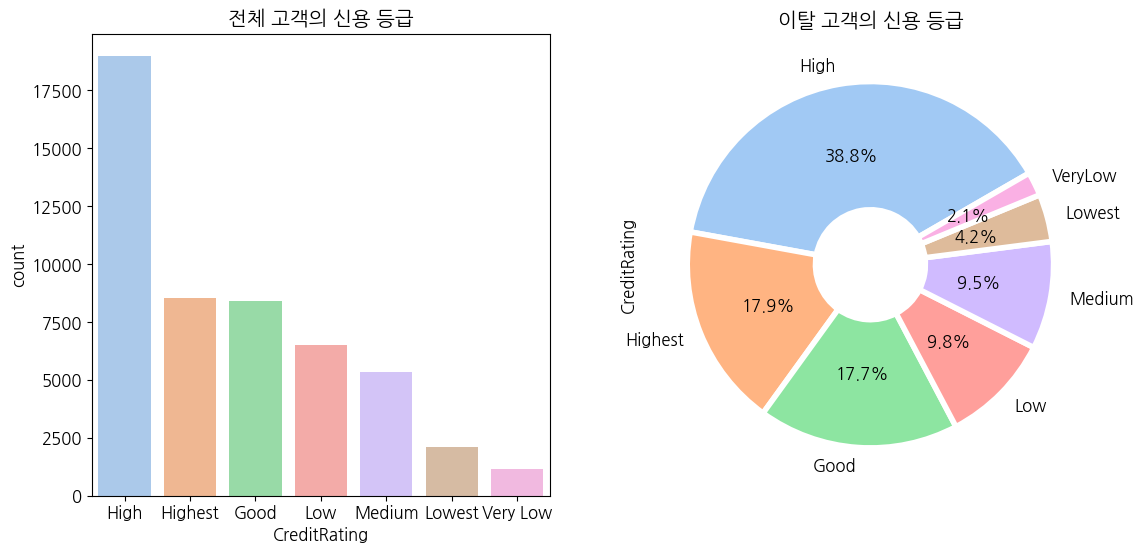

In [25]:
f,ax = plt.subplots(1,2, figsize=(13,6))
sns.set_palette("pastel")

sns.countplot(x='CreditRating', data=train, order = train['CreditRating'].value_counts().index, ax=ax[0])
ax[0].set_title('전체 고객의 신용 등급')
ax[0].set_xticklabels(['High', 'Highest', 'Good', 'Low', 'Medium', 'Lowest', 'Very Low'])

(get_percent(churn_y, 'CreditRating').sort_values(ascending=False)).plot.pie(
    autopct='%1.1f%%',
    labels=['High', 'Highest', 'Good', 'Low', 'Medium', 'Lowest', 'VeryLow'],
    startangle=30,
    ax=ax[1],
    wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 4},
    shadow=False
)
ax[1].set_title('이탈 고객의 신용 등급')

plt.show()

* 이탈 고객의 절반 이상이 신용 등급이 높다.(high, highest)

### 소득 계층

In [26]:
income_percent = pd.concat([pivot_percent(churn_y, 'IncomeGroup'), pivot_percent(churn_n, 'IncomeGroup')], axis=1)
income_percent

Churn,Yes,No
IncomeGroup,,
0,26.4,24.6
1,4.0,4.0
2,2.4,2.3
3,5.3,6.1
4,7.6,8.1
5,8.2,8.4
6,18.5,18.9
7,11.9,11.4
8,4.9,5.2


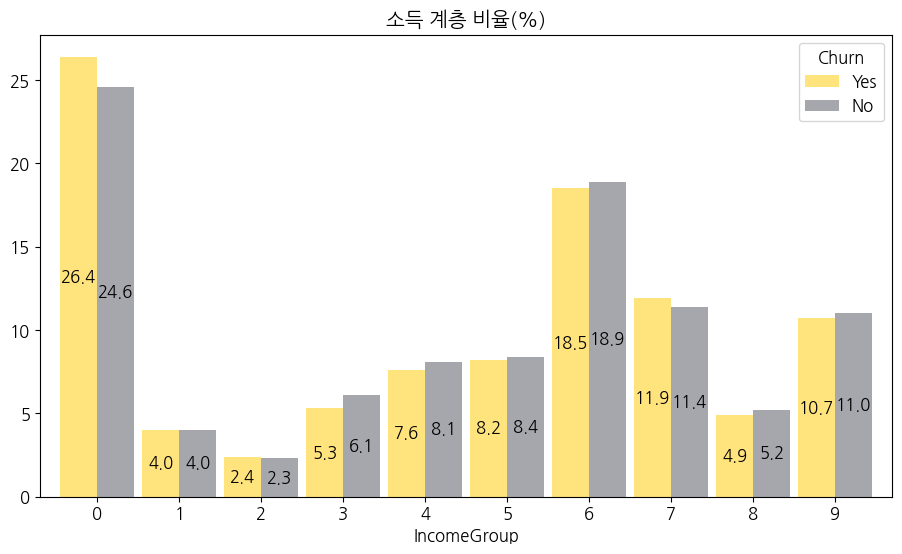

In [27]:
ax = income_percent.plot(kind="bar", figsize=(11,6), width=0.9,
                         color=['#ffe37d', '#a6a7ad'])

for c in ax.containers:
    labels = [ x.get_height() for x in c ]
    ax.bar_label(c, labels= np.round(labels, 1), label_type='center')
    
plt.rcParams['font.size'] = 12
plt.title('소득 계층 비율(%)')
plt.xticks(rotation=0)
plt.show()

* 소득 수준을 0~9로 나누었을 때, 소득 계층이 0인 고객의 이탈률이 가장 높다.(이탈 고객의 26.4%, 미이탈 고객의 24.6%를 차지한다.)

### 나이

* EDA 과정에서는 원래 데이터의 분포 상태만 나타냈습니다.(나이가 0인 데이터 수정하지 않았음)
* 나이가 0인 데이터를 소득 그룹과 신용등급이 동일한 그룹의 중간값으로 수정한 이후의 시각화 자료가 필요하시면 알려주세요!

In [28]:
# age_category 생성
train['age_category'] = np.nan

In [29]:
def fill_age_category(num1, num2, groupName):
    train.loc[(train['Age'] >= num1) & (train['Age'] <= num2), "age_category"] = groupName

In [30]:
fill_age_category(0, 0, 'zero')
fill_age_category(9, 19, 'student')
fill_age_category(20, 29, 'twenties')
fill_age_category(30, 39, 'thirties')
fill_age_category(40, 49, 'forties')
fill_age_category(50, 59, 'fifties')
fill_age_category(60, 92, 'senior')

In [31]:
train['age_category'].value_counts()

zero        13917
forties      7918
thirties     7150
student      7087
twenties     6042
fifties      5648
senior       2375
Name: age_category, dtype: int64

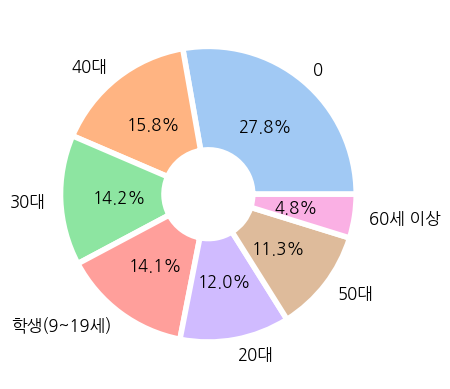

In [32]:
plt.pie(get_percent(train, 'age_category'), 
        autopct='%.1f%%',
        labels=['0', '40대', '30대', '학생(9~19세)', '20대', '50대', '60세 이상'],
        wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 4},
        colors=sns.set_palette("pastel"),
        shadow=False)

plt.show()

* 나이가 0으로 표시된 고객이 13,917명(27.8%) 이다.

In [33]:
# 나이가 0으로 표시된 고객 제외
age_except_zero = train[train['age_category'] != 'zero']

In [34]:
get_percent(age_except_zero, 'age_category')

forties     21.3
thirties    19.3
student     19.1
twenties    16.3
fifties     15.2
senior       6.4
Name: age_category, dtype: float64

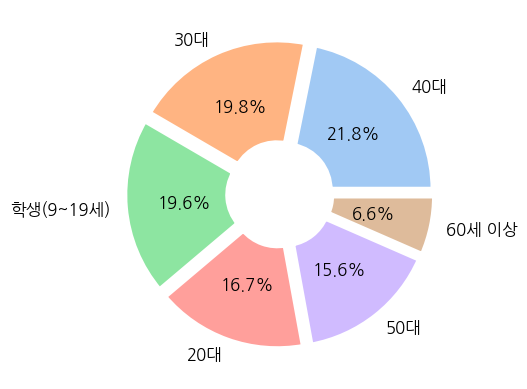

In [35]:
plt.pie(get_percent(age_except_zero, 'age_category'), 
        autopct='%.1f%%',
        labels=['40대', '30대', '학생(9~19세)', '20대', '50대', '60세 이상'],
        explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
        wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 4},
        colors=sns.set_palette("pastel"),
        shadow=False)

plt.show()

* 9세부터 92세까지 다양한 연령대의 고객이 존재한다.
* 9~19세(학생), 20대, 30대, 40대, 50대, 60세 이상으로 고객 연령대를 나누었다.
* 40대 고객이 가장 많고 30대도 많은 편이다.

### 서비스 이용 기간

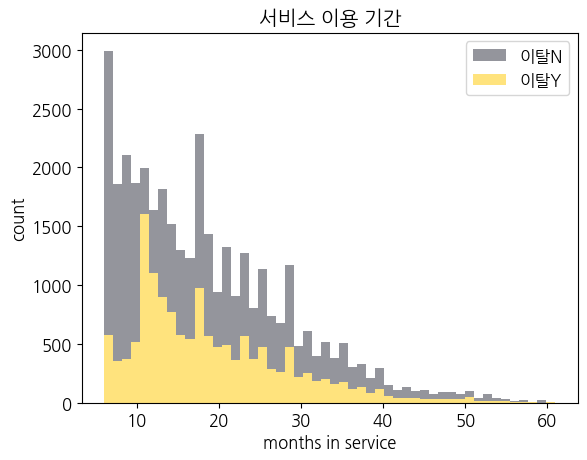

In [36]:
plt.hist((churn_y['MonthsInService'], churn_n['MonthsInService']), 
         bins=50, histtype='stepfilled', color=['#ffe37d','#94959c'])
plt.xlabel('months in service')
plt.ylabel('count')
plt.legend(['이탈N', '이탈Y'])
plt.title('서비스 이용 기간')
plt.show()

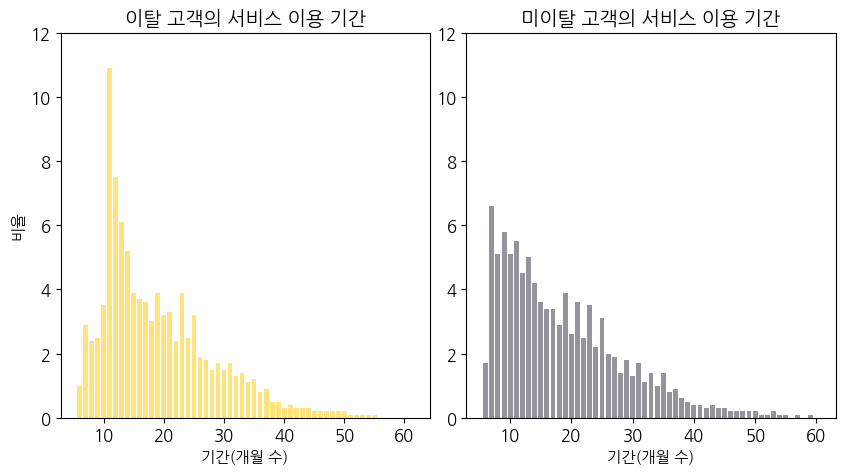

In [37]:
f, axes = plt.subplots(1,2)
f.set_size_inches((10,5))
plt.subplots_adjust(wspace=0.1)

axes[0].bar(get_percent(churn_y, 'MonthsInService').index, get_percent(churn_y, 'MonthsInService').values, color='#ffe37d')
axes[0].set_title('이탈 고객의 서비스 이용 기간', fontsize = 14)
axes[0].set_ylim([0,12])
axes[0].set_xlabel('기간(개월 수)', fontsize = 11)
axes[0].set_ylabel('비율', fontsize = 11)

axes[1].bar(get_percent(churn_n, 'MonthsInService').index, get_percent(churn_n, 'MonthsInService').values, color='#94959c')
axes[1].set_title('미이탈 고객의 서비스 이용 기간', fontsize = 14)
axes[1].set_xlabel('기간(개월 수)', fontsize = 11)
axes[1].set_ylim([0,12])
plt.show()

* 이탈 고객과 미이탈 고객의 서비스 이용 기간을 비율로 나타냈을 때, 이탈 고객의 이용 기간은 11개월이 10.9%로 가장 많았고 12개월은 7.5%, 13개월은 6.1%를 차지한다.
* 미이탈 고객의 서비스 이용 기간은 7개월이 6.6%로 가장 많았다.

### 월별 사용량

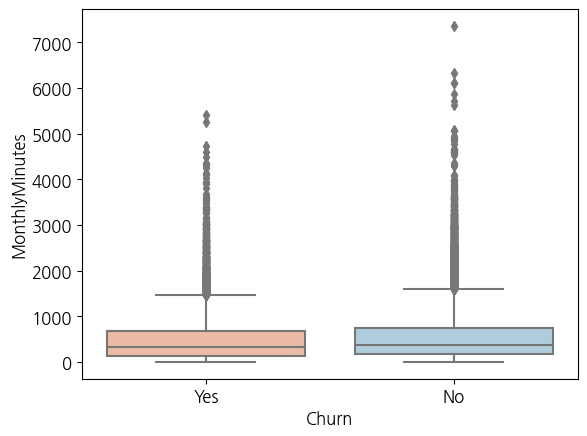

In [38]:
sns.boxplot(data=train, x="Churn", y="MonthlyMinutes", palette = "RdBu");

* 이상치가 많아서 뚜렷한 차이를 볼 수 없었다.

In [39]:
print('월별 이용 시간이 400분 미만인 고객: 전체 고객의 {}%'.format(round(len(train[train.MonthlyMinutes<400])/len(train)*100),1))

월별 이용 시간이 400분 미만인 고객: 전체 고객의 53%


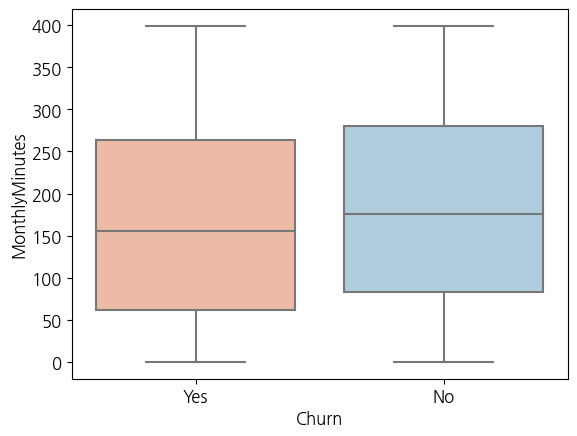

In [40]:
sns.boxplot(data=train[train.MonthlyMinutes<400], x="Churn", y="MonthlyMinutes", palette = "RdBu");

* 이용 시간이 400분 미만인 고객을 대상으로 box plot
* 미이탈 고객의 이용 시간이 이탈 고객보다 조금 더 많다.

### Total recurring charge

In [41]:
print('월별 요금이 60 미만인 고객: 전체 고객의 {}%'.format(round(len(train[train.TotalRecurringCharge<60])/len(train)*100),1))

월별 요금이 60 미만인 고객: 전체 고객의 73%


In [42]:
# 요금이 60 미만인 고객 이탈/미이탈로 구분하여 dataframe 생성
under60_y = churn_y[churn_y.TotalRecurringCharge<60]
under60_n = churn_n[churn_n.TotalRecurringCharge<60]

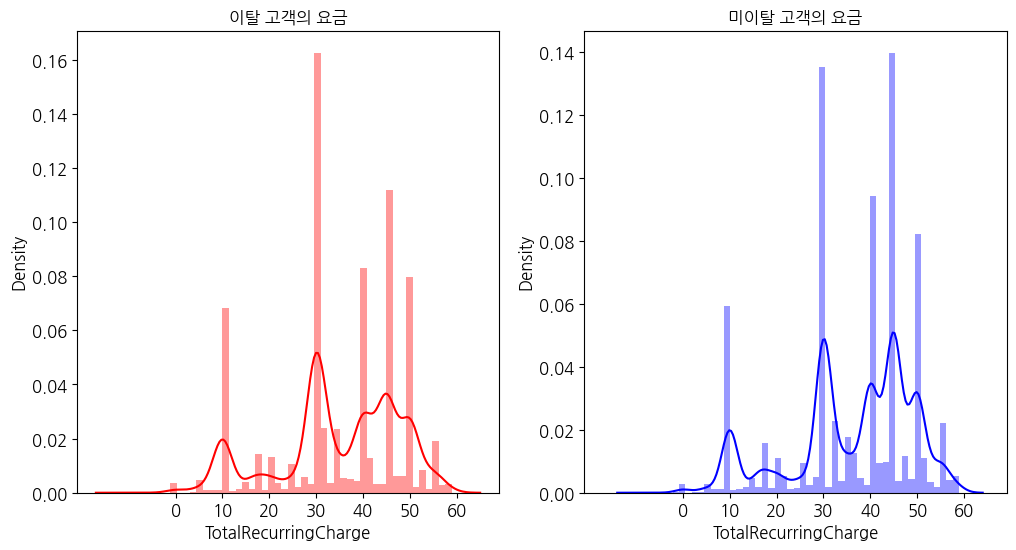

In [43]:
f, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

sns.distplot(under60_y['TotalRecurringCharge'], color="Red", ax=axes[0])
axes[0].set_title('이탈 고객의 요금', fontsize = 12)
axes[0].set_xticks([0, 10, 20, 30, 40, 50, 60])

sns.distplot(under60_n['TotalRecurringCharge'], color="Blue", ax=axes[1])
axes[1].set_title('미이탈 고객의 요금', fontsize = 12)

plt.show()

* 이탈 고객은 30달러 요금제를 가장 많이 사용한다.
* 미이탈 고객은 45달러, 30달러 요금제를 많이 사용한다.

### 현재 기기 사용 기간

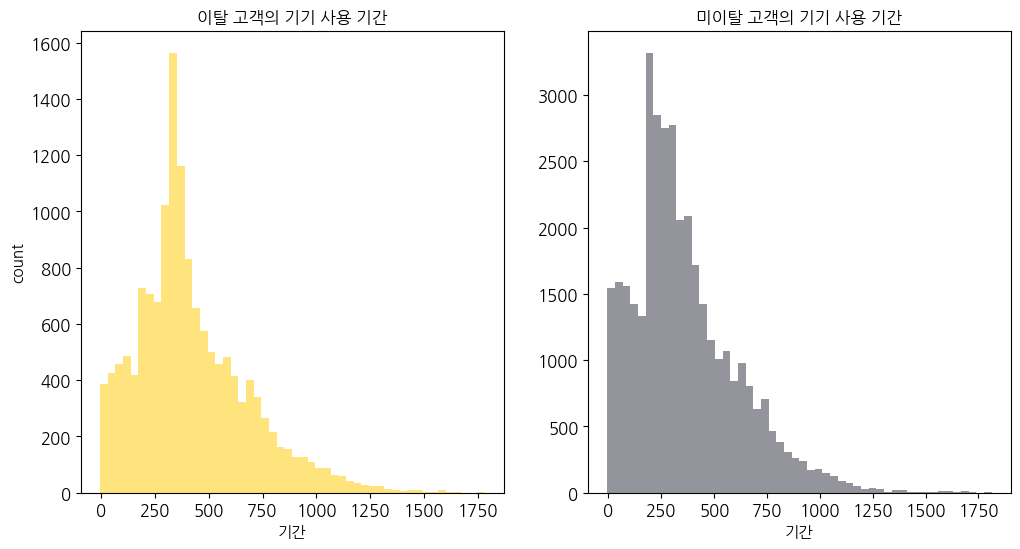

In [44]:
f, axes = plt.subplots(1,2)
f.set_size_inches((12,6))
plt.subplots_adjust(wspace=0.2)

axes[0].hist(churn_y['CurrentEquipmentDays'], color='#ffe37d', bins=50)
axes[0].set_title('이탈 고객의 기기 사용 기간', fontsize = 12)
axes[0].set_ylabel('count', fontsize = 11)
axes[0].set_xlabel('기간', fontsize = 11)

axes[1].hist(churn_n['CurrentEquipmentDays'], color='#94959c', bins=50)
axes[1].set_title('미이탈 고객의 기기 사용 기간', fontsize = 12)
axes[1].set_xlabel('기간', fontsize = 11)
plt.show()

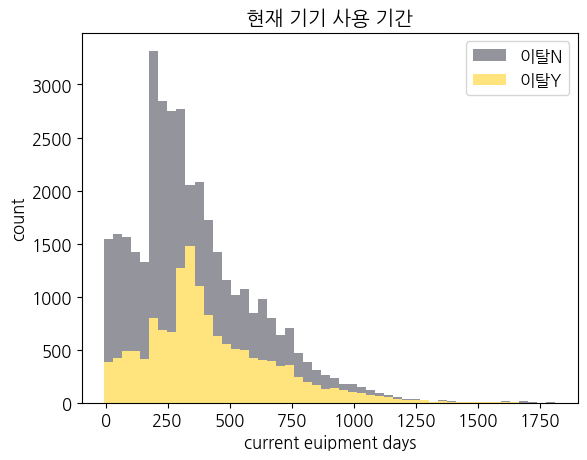

In [45]:
plt.hist((churn_y['CurrentEquipmentDays'], churn_n['CurrentEquipmentDays']), 
         bins=50, histtype='stepfilled', color=['#ffe37d','#94959c'])
plt.xlabel('current euipment days')
plt.ylabel('count')
plt.legend(['이탈N', '이탈Y'])
plt.title('현재 기기 사용 기간')
plt.show()

* 미이탈 고객의 기기 사용 기간이 짧은 쪽에 더 많이 분포되어 있다.

### 직업

In [46]:
occupation_percent = pd.concat([pivot_percent(churn_y, 'Occupation'), pivot_percent(churn_n, 'Occupation')], axis=1)
occupation_percent

Churn,Yes,No
Occupation,,
Clerical,2.0,1.9
Crafts,2.9,3.0
Homemaker,0.3,0.3
Other,74.3,73.5
Professional,16.8,17.3
Retired,1.3,1.5
Self,1.7,1.8
Student,0.8,0.7


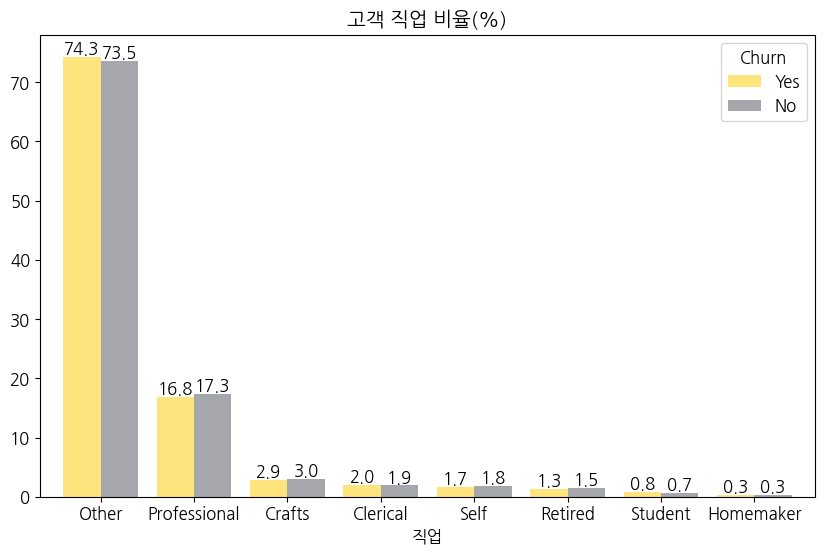

In [47]:
ax = occupation_percent.sort_values(by='Yes', ascending=False).plot(kind="bar",figsize=(10,6), width=0.8, color = ['#ffe37d','#a6a7ad'])

for c in ax.containers:
    labels = [ x.get_height() for x in c ]
    ax.bar_label(c, labels= np.round(labels,1), label_type='edge')

plt.rcParams['font.size'] = 12
plt.title('고객 직업 비율(%)')
plt.xticks(rotation=0)
plt.xlabel("직업")
plt.show()

* 직업이 명시되지 않은 고객이 70% 이상이다.
* 사무직, 공예원, 주부, 전문직, 퇴직, 자영업, 학생, 기타 등의 직업으로 나눠졌다.
* 기타를 제외하고 전문직의 이탈률이 가장 높았다.

### BlockedCalls(차단 전화)

In [48]:
train.BlockedCalls.describe()

count    51047.000000
mean         4.085672
std         10.946905
min          0.000000
25%          0.000000
50%          1.000000
75%          3.700000
max        384.300000
Name: BlockedCalls, dtype: float64

In [49]:
print('차단 전화 건수가 5건 미만인 고객: 전체 고객의 {}%'.format(round(len(train[train.BlockedCalls<5])/len(train)*100),1))

차단 전화 건수가 5건 미만인 고객: 전체 고객의 80%


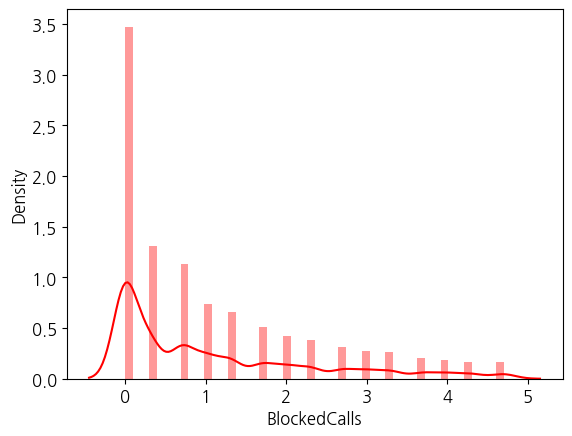

In [51]:
ax = sns.distplot(train[train['BlockedCalls']<5].BlockedCalls, color="Red")

### ReceivedCalls(수신 전화)

In [53]:
train.ReceivedCalls.describe()

count    51047.000000
mean       114.800121
std        166.485896
min          0.000000
25%          8.300000
50%         52.800000
75%        153.500000
max       2692.400000
Name: ReceivedCalls, dtype: float64

In [54]:
print('수신 전화 건수가 150건 미만인 고객: 전체 고객의 {}%'.format(round(len(train[train.ReceivedCalls<150])/len(train)*100),1))

수신 전화 건수가 150건 미만인 고객: 전체 고객의 74%


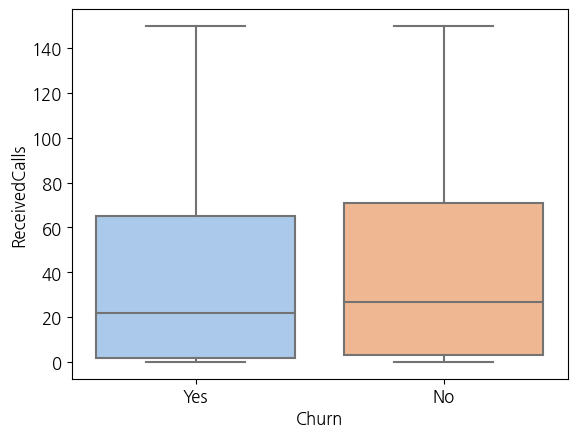

In [55]:
sns.boxplot(x='Churn', y='ReceivedCalls', data=train[train['ReceivedCalls']<150]);

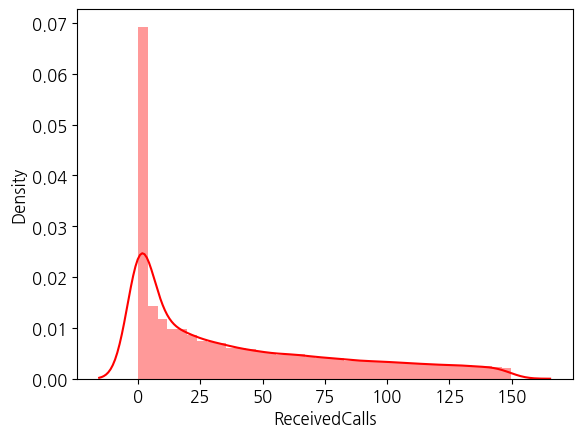

In [56]:
ax = sns.distplot(train[train['ReceivedCalls']<150].ReceivedCalls, color="Red")

### OverageMinutes(요금제 초과 사용 시간)

In [58]:
train.OverageMinutes.describe()

count    50891.000000
mean        40.027785
std         96.588076
min          0.000000
25%          0.000000
50%          3.000000
75%         41.000000
max       4321.000000
Name: OverageMinutes, dtype: float64

In [59]:
print('요금제 초과 사용 시간이 40분 미만인 고객: 전체 고객의 {}%'.format(round(len(train[train.OverageMinutes<40])/len(train)*100),1))

요금제 초과 사용 시간이 40분 미만인 고객: 전체 고객의 74%


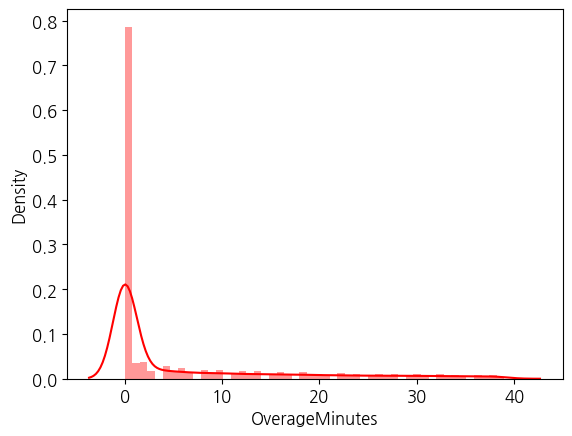

In [61]:
ax = sns.distplot(train[train['OverageMinutes']<40].OverageMinutes, color="Red")

### CustomerCareCalls(서비스센터 → 고객 전화 수)

In [63]:
train.CustomerCareCalls.describe()

count    51047.000000
mean         1.868999
std          5.096138
min          0.000000
25%          0.000000
50%          0.000000
75%          1.700000
max        327.300000
Name: CustomerCareCalls, dtype: float64

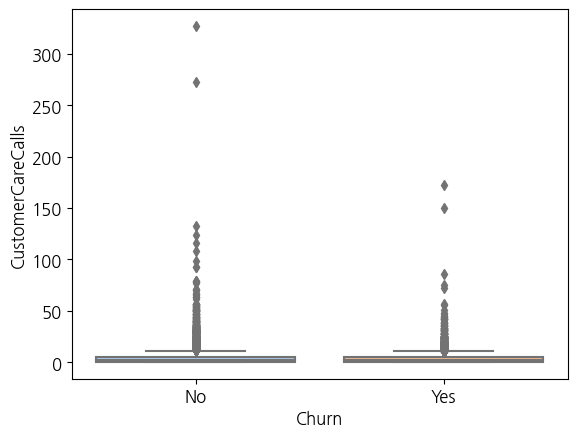

In [64]:
sns.boxplot(x='Churn', y='CustomerCareCalls', data=train[train['CustomerCareCalls']>0]);

In [86]:
train[train['CustomerCareCalls']>200]

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Family,Age,count,age_category
10503,No,77.78,1702.0,68.0,0.0,6.0,0.0,-427.0,-1.1,24.7,163.7,184.7,327.3,7.3,683.2,55.0,28.0,308.7,426.3,188.3,0.0,11.7,24,1,1,4.0,2.0,330.0,No,No,Yes,Yes,Yes,Known,No,No,No,No,No,Yes,0,0,No,No,1,2,No,1,30,No,2-High,Suburban,Other,No,Unknown,26.0,1,twenties
40077,No,107.41,490.0,30.0,0.0,98.0,0.0,404.0,-4.4,9.0,30.0,12.0,273.0,0.0,63.6,11.7,1.0,102.7,112.7,142.7,0.0,0.3,9,1,1,2.0,1.0,75.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,Yes,No,0,3,No,0,80,No,5-Low,Rural,Other,Unknown,Unknown,0.0,1,zero


* 최대값이 327이다. 서비스센터에서 고객에게 327건이나 전화를 한 이유는 알 수 없다.
* 서비스센터에서 200건 이상 전화를 받은 고객 2명 모두 미이탈 고객이다.

### MadeCallToRetentionTeam(고객 → 서비스센터 전화 Y/N)

In [66]:
# 전체 고객 중 서비스 센터에 전화한 사람의 비율
get_percent(train, 'MadeCallToRetentionTeam')

No     96.6
Yes     3.4
Name: MadeCallToRetentionTeam, dtype: float64

In [89]:
# 이탈 여부별로 서비스 센터에 전화한 사람의 비율
pd.concat([pivot_percent(churn_n, 'MadeCallToRetentionTeam'), pivot_percent(churn_y, 'MadeCallToRetentionTeam')], axis=1)

Churn,No,Yes
MadeCallToRetentionTeam,,
No,97.4,94.7
Yes,2.6,5.3


### RetentionCalls(고객 → 서비스센터 전화 수)

In [68]:
train.RetentionCalls.value_counts()

0    49302
1     1609
2      120
3       14
4        2
Name: RetentionCalls, dtype: int64

* 고객이 서비스 센터에 전화를 하지 않는 경우가 많다.(49,302명)
* 전화를 하더라도 고객의 불만 사항 때문이지 않을까?
* 서비스 센터에 전화를 한 고객은 소수이지만, 분석이 필요해 보인다.

In [69]:
train[train['RetentionCalls']==4]

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Family,Age,count,age_category
2158,Yes,51.42,267.0,40.0,0.99,35.0,0.6,-265.0,-20.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36,4,1,9.0,3.0,59.0,No,Yes,Yes,No,No,Unknown,No,No,No,No,No,No,4,2,No,No,0,0,No,0,10,Yes,1-Highest,Suburban,Other,Unknown,Unknown,0.0,1,zero
5813,Yes,83.53,287.0,30.0,1.24,168.0,0.0,84.0,-11.2,18.7,3.7,35.7,1.7,0.0,27.9,20.0,1.0,98.7,49.7,22.3,0.0,0.7,31,1,1,3.0,2.0,745.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,4,3,No,Yes,0,0,No,0,10,Yes,3-Good,Town,Other,Unknown,Unknown,0.0,1,zero


* 이유는 알 수 없지만, 서비스 센터에 4건 전화한 고객 2명 모두 이탈 고객이다.

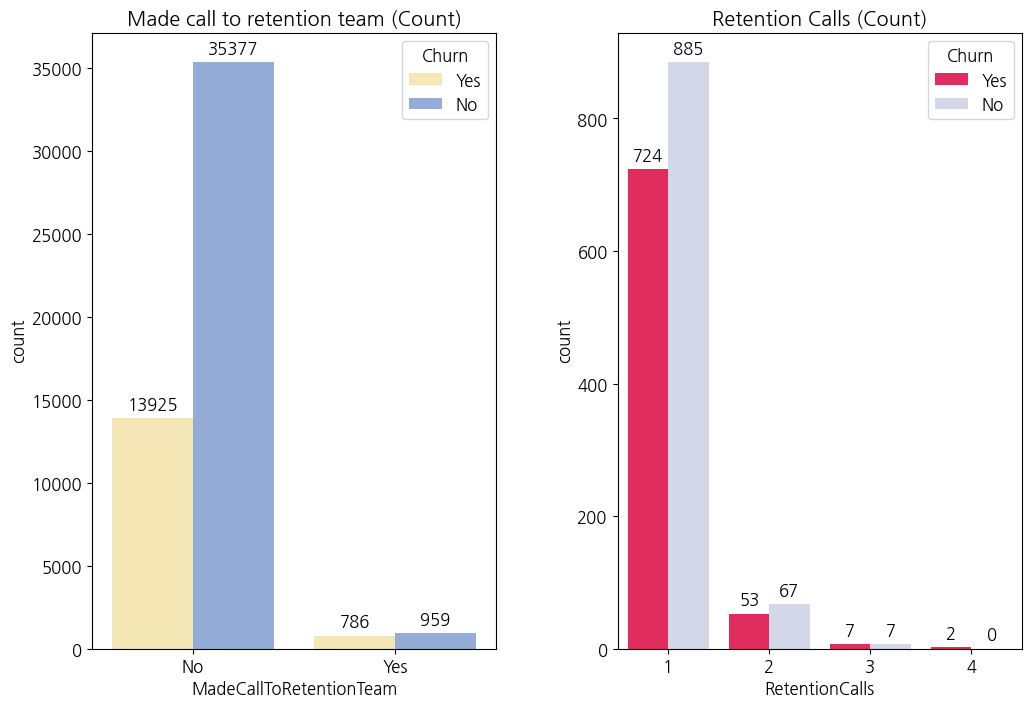

In [91]:
f, ax = plt.subplots(1,2, figsize=(12,8))
plt.subplots_adjust(wspace=0.3)

ax[0].set_title('Made call to retention team (Count)')
order = ['No', 'Yes']
sns.countplot(x='MadeCallToRetentionTeam', hue='Churn', data=train, ax=ax[0], order=order, palette=['#ffecab', '#89aae3'])

for p in ax[0].patches: # 데이터 텍스트 표시  
    ax[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 

ax[1].set_title('Retention Calls (Count)')
sns.countplot(x='RetentionCalls', data=train[train['RetentionCalls']>0], hue='Churn', ax=ax[1], palette=['#ff0f4f', '#CED7EA'])

for p in ax[1].patches: # 데이터 텍스트 표시 
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.rcParams['font.size'] = 12
plt.show()

* 전체 고객중에 1,745명(3.4%)이 서비스 센터에 전화를 했다.
* 이탈 여부로 나누어 보면 서비스 센터에 전화를 한 고객은 이탈 고객의 5.3%, 미이탈 고객의 2.6%를 차지한다.

In [71]:
print('서비스 센터에 전화를 걸었던 고객들로부터 얻는 수익: {}'.format(round(train[train['MadeCallToRetentionTeam'] == 'Yes'].MonthlyRevenue.sum())))

서비스 센터에 전화를 걸었던 고객들로부터 얻는 수익: 106719


In [72]:
loss = train[train['MadeCallToRetentionTeam'] == 'Yes'].MonthlyRevenue.sum() / train.MonthlyRevenue.sum() * 100
print('서비스 센터에 전화를 걸었던 고객이 모두 이탈하는 경우, 전체 수익의 {}% 감소'.format(round(loss, 1)))

서비스 센터에 전화를 걸었던 고객이 모두 이탈하는 경우, 전체 수익의 3.6% 감소


* 만약 서비스 센터에 전화를 걸었던 고객이 모두 이탈하는 경우, 한달 수익의 3.6%가 감소하게 된다.

### 상관관계 확인

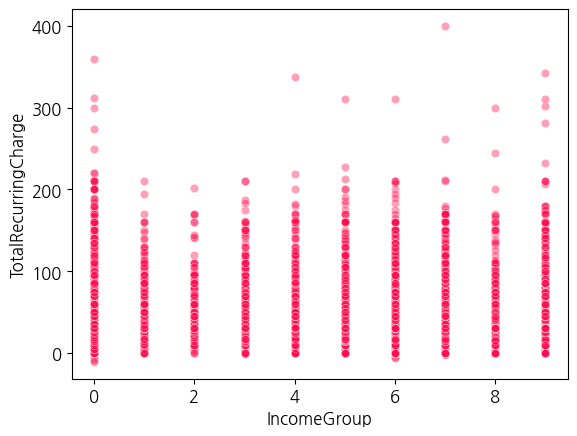

In [93]:
sns.scatterplot(data=train, x='IncomeGroup', y='TotalRecurringCharge', c='#ff0f4f', alpha=0.4);

* 소득 계층과 요금은 관련이 없어 보인다.

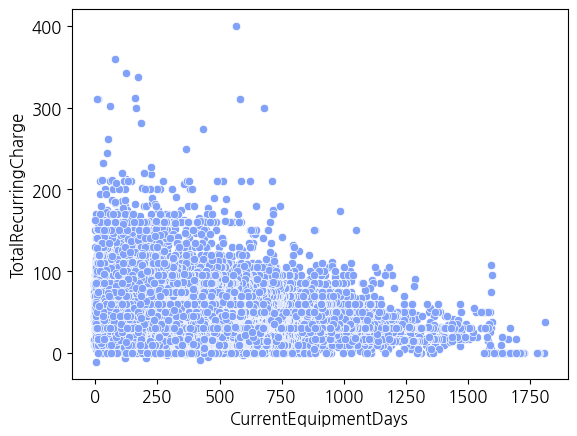

In [95]:
sns.scatterplot(data=train, x='CurrentEquipmentDays', y='TotalRecurringCharge', color='#82a2fa');

* 기기를 사용하는 기간이 길어질수록 요금이 낮아지는 경향을 보인다.